# Research Exercise 4: Bibliographic Data and Borrowing Records

Last week we thought about reviews and what they tell us about what 19th-century readers thought about particular books. This week, we're going to think about WHAT readers read (or at least, what they checked out of the library). We're going to do this by working with some bibliographic data about particular editions of works checked out from the Seattle Public Library, from 2010 to 2017.

Along the way we're going to learn how to use Python to clean a tabular dataset, perform simple analysis, slice up our dataset into meaningful subsets, make simple data visualizations, and work with missing data.


- [1. What is Pandas?](#What-is-Pandas?)
    - [Dataset: Seattle Public Library Circulation Data (2010-2017)](#Dataset:-Seattle-Public-Library-Circulation-Data-(2010-2017))
    - [Cheatsheet: Operations we can peform on DataFrames](#Cheatsheet:-Operations-we-can-peform-on-DataFrames)
    - [Using Pandas to analyze data](#Using-Pandas-to-analyze-data)
- [2: Exercises](#2.-Exercises) 
    - [**Exercise 1**: Finding out more about our dataset](#Exercise-1:-Finding-out-more-about-our-dataset) 
    - [**Exercise 2**: Making a visualization](#Exercise-2:-Making-a-visualization)
    - [**Exercise 3**: Exploratory data analysis](#Exercise-3:-Exploratory-data-analysis)


## What is Pandas?

**`pandas`**, is a special Python library for working with tabular data. It comes as part of the Anaconda version of python that we installed (it's one of the reasons we use this version of Python). Itt can help us do:

- Read in tabular data from a CSV file (remember, CSV is short for comma-separarated values, a format for storing tabular data)
- Store that data in something called a "dataframe"
- Explore and filter data
- Create simple visualizations

`pandas` will read in tabular data (ie, a spreadsheet in the form of a .CSV, .TSV file). This library can also work with data in slightly more complicated formats, like JSON files.

When you read in a file, `pandas` creates a **DataFrame** --a special Python object that we can perform operations on. Think of a dataframe as a souped up spreadsheet––it stores values in an array.`



## Dataset: Seattle Public Library Circulation Data (2010-2017)

For this week's research exercise, we're going to be working with the Seattle Public Library's borrowing Records 2005-present, which the city of Seattle makes available and free to use.

![image](../_images/seattle-public-library.jpg)

We're working with a **modified**, smaller version of the dataset: the Seattle Public Library Circulation Data for books checked out at least 10 times between 2010-2017.This modified dataset also incorporates some data from the Titles field and separates out author names into their own column. 

Before you continue, tatke some time to read about the larger dataset of all Seattle "About this Dataset" and "Columns in this about what each of the columns mean: https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff. If you want to know about  the library's holdings in general, take a look at the [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf).

First, let's load in pandas and our dataset, the [Seattle Public Library Circulation Data](https://data.seattle.gov/Community/Checkouts-By-Title-Physical-Items-/5src-czff/data).

In [123]:
import pandas as pd ## Here we're giving pandas the nickname `pd`
pd.options.display.max_rows = 100

# Let's load in our CSV file as a DataFrame and assign it to a variable called `seattle_library_df`
seattle_library_df = pd.read_csv('../_datasets/Seattle_Book_Checkouts_2010_2017.csv', delimiter=",", parse_dates=[['CheckoutYear', 'CheckoutMonth' ]])

### Display our DataFrame
Like other Python variables, we can simply type the name of our DataFrame to get a peek at what it contains

In [124]:
seattle_library_df.head(10)

,CheckoutYear_CheckoutMonth,UsageClass,CheckoutType,MaterialType,Checkouts,Title,Author,Subjects,Publisher,PublicationYear
0,2011-04-01,Physical,Horizon,BOOK,15,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010
1,2010-03-01,Physical,Horizon,BOOK,12,Sock innovation : knitting techniques & patter...,"A., Cookie","Knitting Patterns, Socks","Interweave Press LLC,",2009
2,2011-02-01,Physical,Horizon,BOOK,12,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010
3,2011-03-01,Physical,Horizon,BOOK,12,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010
4,2011-06-01,Physical,Horizon,BOOK,10,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010
5,2011-11-01,Physical,Horizon,BOOK,10,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010
6,2012-03-01,Physical,Horizon,BOOK,14,Welcome to your child's brain : how the mind g...,"Aamodt, Sandra","Child development, Brain Growth, Neurophysiolo...","Bloomsbury,",2011
7,2016-07-01,Physical,Horizon,BOOK,13,Why diets make us fat : the unintended consequ...,"Aamodt, Sandra","Weight loss Psychological aspects, Weight gain...","Current,",[2016]
8,2011-12-01,Physical,Horizon,BOOK,13,Welcome to your child's brain : how the mind g...,"Aamodt, Sandra","Child development, Brain Growth, Neurophysiolo...","Bloomsbury,",2011
9,2012-02-01,Physical,Horizon,BOOK,13,Welcome to your child's brain : how the mind g...,"Aamodt, Sandra","Child development, Brain Growth, Neurophysiolo...","Bloomsbury,",2011


### Select columns
To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets `[]`and a column name in quotations marks.

In [125]:
# Select only the column labeled "Title"
seattle_library_df['Title']

0         Knit. sock. love. / Cookie A ; photography by ...
1         Sock innovation : knitting techniques & patter...
2         Knit. sock. love. / Cookie A ; photography by ...
3         Knit. sock. love. / Cookie A ; photography by ...
4         Knit. sock. love. / Cookie A ; photography by ...
                                ...                        
581692    Selfish, shallow, and self-absorbed : sixteen ...
581693    Dangerous women / edited by George R.R. Martin...
581694    Peppa pig and the vegetable garden / Candlewic...
581695    Nighttime animals / [U.S. senior editor, Shann...
581696    Ultimate Spider-Man. [Vol. 6] / [adaped by Joe...
Name: Title, Length: 581697, dtype: object

To select multiple columns, we need to treat them like a dataframe, and enclose them in TWO sets of square brackets `[[ ]]`. 

In [126]:
seattle_library_df[['Checkouts', 'Title']]

,Checkouts,Title
0,15,Knit. sock. love. / Cookie A ; photography by ...
1,12,Sock innovation : knitting techniques & patter...
2,12,Knit. sock. love. / Cookie A ; photography by ...
3,12,Knit. sock. love. / Cookie A ; photography by ...
4,10,Knit. sock. love. / Cookie A ; photography by ...
...,...,...
581692,10,"Selfish, shallow, and self-absorbed : sixteen ..."
581693,10,Dangerous women / edited by George R.R. Martin...
581694,10,Peppa pig and the vegetable garden / Candlewic...
581695,10,"Nighttime animals / [U.S. senior editor, Shann..."


### Sort columns
Let's sort columns using the `sort_values()` operation to look at the top 50 books that were checked out in a single month (and the number of times they were checked out that month)

In [127]:
seattle_library_df[['Checkouts', 'Title']].sort_values(by=['Checkouts'], ascending=False).head(50)

,Checkouts,Title
93453,810,Two kinds of truth / Michael Connelly.
82839,782,The midnight line / Lee Child.
82840,778,The midnight line / Lee Child.
134306,777,Manhattan Beach : a novel / Jennifer Egan.
520889,776,Artemis : a novel / Andy Weir.
182285,763,The Rooster Bar / John Grisham.
195616,742,The whole30 fast & easy : 150 simply delicious...
134307,714,Manhattan Beach : a novel / Jennifer Egan.
382704,713,Smitten kitchen every day : triumphant and unf...
93454,710,Two kinds of truth / Michael Connelly.


## 💡Check in:

Let's take a minute to look at the data that we've just produced. Do you notice anything strange in the Titles column? What might we need to keep in mind if we're working with this data?

### -- Write your reflection here --

### Count Values
To count values––ie, the number of times a particular value appears as an entry in our dataframe––, we select a column, and use the `.value_counts()` operator. Let's count the number of times that various publishers appear.

In [128]:
seattle_library_df['Publisher'].value_counts()

Random House,                                                35182
Harper,                                                      15792
Scholastic,                                                  14974
Candlewick Press,                                            14463
Alfred A. Knopf,                                             12171
                                                             ...  
Dutton, Penguin Group USA,                                       1
Pam Krauss Books/Avery,                                          1
Walker & Company : Distributed to the trade by Macmillan,        1
Williamson Pub. Co.,                                             1
Old Seattle Press ; Distributed by Aftershocks,                  1
Name: Publisher, Length: 4850, dtype: int64

---

## Cheatsheet: Operations we can peform on DataFrames

### Using string methods to clean or transform data in columns: 

![image](../_images/pusheen-yarn.png)

| **Pandas String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| df['column_name']`.str.lower()`         | makes the string in each row lowercase                                                                                |
| df['column_name']`.str.upper()`         | makes the string in each row uppercase                                                |
| df['column_name']`.str.title()`         | makes the string in each row titlecase                                                |
| df['column_name']`.str.replace('old string', 'new string')`      | replaces `old string` with `new string` for each row |
| df['column_name']`.str.contains('some string')`      | tests whether string in each row contains "some string" |
| df['column_name']`.str.split('delim')`          | returns a list of substrings separated by the given delimiter |
| df['column_name']`.str.join(list)`         | opposite of split(), joins the elements in the given list together using the string                                                                   


### Renaming, adding, dropping columns
![image](../_images/pusheen-bake.png)

| Pandas operation | Explanation |
| :--- |:--- |
|df`.rename(columns={'old_name_of_column': 'new_name_of_column'})` | rename a column (or columns)|
|df`.add(columns='name_of_column')`| add a column |
|df`.drop(columns='name_of_column')`| drop a column |

### Working with missing data
![image](../_images/pusheen-detective.jpg)

| Pandas operation | Explanation |
| :--- | :--- |
| df['column_name']`.isna()` |returns a True/False pairs for each row in a dataframe that is blank|
| df['column_name']`.notna()` |returns a True/False pairs for each row in a dataframe that is **NOT** blank|
| df['column_name']`.fillna()` | will allow you to fill in blank values with a new value |

### Sorting, calculating, and `groupby()`
![image](../_images/pusheen-typing.png)

Note: some of these operations will only be able to run on certain data types (like integers and floats), while others, like `.count()` can help you generate quantitative data about a column of qualitative values (like the number of times a value appears).

| Pandas operation | Explanation |
| :--- | :--- |
|df['column_name']`.count()`| gives you the number of observations, ie the number of rows with non-blank values|
|df['column_name']`.value_counts()` | aggregates the data in a column and counts (cumulatively) each unique value |
|df['column_name']`.sum()` | gives you the sum of values|
|df['column_name']`.mean()` | gives you the mean of values in the column
|df['column_name']`.median()`| median of values|
|df['column_name']`.min()` | gives the minimum value in the column |
|df['column_name']`.max()` |gives the maximum value in the column|
|df['column_name']`.mode()`| gives the mode of the column |
|df['column_name'].`std()`| gives the "unbiased standard deviation" - a statistical term for the estimated dispersion of values| 
|df`.describe(include='all')` | calculates the summary statistics for all columns of the dataframe|
|df`.groupby('column_name')` | allows us to group data and perform calculations on the groups.|

> Note! Pay attention to the difference in syntax between `.describe()`, `.groupby()` and other commands.



____

## Using Pandas to analyze data

### Counting values

Some of these commands we learned last Python lesson,when we used `.value_counts()` to look at the number of each value in the "locations" column and used the slice method (`[:10]`) to look at just the top 10. Let's Let's count the number of times that that the top 10 most checked-out authors appear in this library checkout data.

In [129]:
print("Author    Number of times works by this creator were checked out")
seattle_library_df['Author'].value_counts()[:10]

Author    Number of times works by this creator were checked out


Meadows, Daisy               7466
Stilton, Geronimo            5549
Osborne, Mary Pope           4767
Seuss, Dr.                   4716
Davis, Jim, 1945 July 28-    4542
Rylant, Cynthia              4274
Willems, Mo                  3708
O'Connor, Jane               3075
Hunter, Erin                 2744
Kusaka, Hidenori             2718
Name: Author, dtype: int64

### Counting missing values

The `.count()` method can also be applied to the DataFrame as a whole to count. Because `.count()` only counts a row with recorded data, we can combine it with the the `len()` function to get the percentage of each field with recorded data.


In [130]:
# To calculate the percentage of recorded data in each column of our dataframe
seattle_library_df.count() / len(seattle_library_df) * 100

CheckoutYear_CheckoutMonth    100.000000
UsageClass                    100.000000
CheckoutType                  100.000000
MaterialType                  100.000000
Checkouts                     100.000000
Title                         100.000000
Author                         94.209013
Subjects                       98.946015
Publisher                      96.723036
PublicationYear                96.727162
dtype: float64

### Filtering and sorting values

We can combine some of these operations we've learned.

What if we wanted to look at all entries with a particular value? We can filter our dataframe for particular values in particular columns.

We type the name of the DataFrame `seattle_library_df` followed by square brackets `[]` and then, instead of inserting a column name in our brackets, we insert a True/False condition. For example, to select only rows that contain the value “Baldwin, James,” we insert the condition `seattle_library_df['Author'] == 'Baldwin, James'`

In [131]:
seattle_library_df[seattle_library_df['Author'] == 'Baldwin, James, 1924-1987']

,CheckoutYear_CheckoutMonth,UsageClass,CheckoutType,MaterialType,Checkouts,Title,Author,Subjects,Publisher,PublicationYear
21866,2017-01-01,Physical,Horizon,BOOK,33,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21867,2017-03-01,Physical,Horizon,BOOK,33,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21868,2017-04-01,Physical,Horizon,BOOK,30,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21869,2016-12-01,Physical,Horizon,BOOK,29,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21870,2017-08-01,Physical,Horizon,BOOK,29,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21871,2017-05-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21872,2017-07-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21873,2017-09-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21874,2017-06-01,Physical,Horizon,BOOK,23,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21875,2017-10-01,Physical,Horizon,BOOK,23,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993


Let's check how many entries there are, using the `len()` function:

In [133]:
print("Number of titles by James Baldwin (method #1):")
len(seattle_library_df[seattle_library_df['Author'] == 'Baldwin, James, 1924-1987'])

Number of titles by James Baldwin (method #1):


61

Before we stop there, let's make sure that we've captured *all* appearances of work by Baldwin in the Seattle Library checkouts. Let's look for all rows where the phrase "Baldwin, James" appears in the 'Author' column:

In [134]:
seattle_library_df[seattle_library_df['Author'].str.contains('Baldwin, James', na=False)]

,CheckoutYear_CheckoutMonth,UsageClass,CheckoutType,MaterialType,Checkouts,Title,Author,Subjects,Publisher,PublicationYear
21866,2017-01-01,Physical,Horizon,BOOK,33,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21867,2017-03-01,Physical,Horizon,BOOK,33,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21868,2017-04-01,Physical,Horizon,BOOK,30,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21869,2016-12-01,Physical,Horizon,BOOK,29,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21870,2017-08-01,Physical,Horizon,BOOK,29,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21871,2017-05-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21872,2017-07-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21873,2017-09-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21874,2017-06-01,Physical,Horizon,BOOK,23,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21875,2017-10-01,Physical,Horizon,BOOK,23,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993


Let's check how many entries there are when we search for Baldwin's work this way:

In [135]:
print("Number of titles by James Baldwin (method #2):")
len(seattle_library_df[seattle_library_df['Author'].str.contains('Baldwin, James', na=False)])

Number of titles by James Baldwin (method #2):


70

Interesting! Take a look at our dataset––what do we think is going on here? What should we be aware of if we're trying to work with this data?

## TYPE YOUR RESPONSE HERE


### Creating a data subset from a filter

We can create a variable with the name of our filter. For instance, if we wanted to compare the dates for when books by James Baldwin were checked out, we could first create a filter for all works whose "Creator" column includes the phrase "Baldwin, James," assign it to a variable, and then select the "CheckoutYear_CheckoutMont" in our new subset of data:

In [136]:
# Create a filter:
baldwin_seattle_library_df = seattle_library_df[seattle_library_df['Author'].str.contains('Baldwin, James', na=False)]

In [137]:
# Then, let's check the contents of our filter
baldwin_seattle_library_df

,CheckoutYear_CheckoutMonth,UsageClass,CheckoutType,MaterialType,Checkouts,Title,Author,Subjects,Publisher,PublicationYear
21866,2017-01-01,Physical,Horizon,BOOK,33,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21867,2017-03-01,Physical,Horizon,BOOK,33,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21868,2017-04-01,Physical,Horizon,BOOK,30,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21869,2016-12-01,Physical,Horizon,BOOK,29,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21870,2017-08-01,Physical,Horizon,BOOK,29,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21871,2017-05-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21872,2017-07-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21873,2017-09-01,Physical,Horizon,BOOK,27,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21874,2017-06-01,Physical,Horizon,BOOK,23,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993
21875,2017-10-01,Physical,Horizon,BOOK,23,The fire next time / James Baldwin.,"Baldwin, James, 1924-1987","African Americans, Black Muslims, United State...","Vintage International Vintage Books,",1993


### Write to a CSV

What if you want to save your output? There's a function for that! We can use the pands function `.to_csv` to write our output to a CSV file. 

Below, we’re also specifying that the encoding is utf-8 and that the Index (the bolded left-most column) is not included in the CSV file.

In [138]:
baldwin_seattle_library_df.to_csv("baldwin_seattle_library_df.csv", encoding='utf-8', index=False)

### Using Groupby to generate statistics about your data

`.groupby()` is a useful tool for performing more complicated coomputations on your dataframe. If you've ever used a **"pivot table"** in Excel or GoogleSpreadsheets, It can be combined with other parameters. We can group all the  so that you can group all the columns in the dataframe by the values in one column, or we group only a subset  of columns. 

- `.groupby('column_name)['name_of_selected_columns_to_be_grouped']` : will group only the selected columns

Ack! What does this mean? 

Let's say we wanted to group our smaller Baldwin dataframe by title, and sum up how many times each title was checked out during this whole period?

In [139]:
baldwin_seattle_library_df.groupby('Title').sum()

,Checkouts
Title,
Another country / James Baldwin.,83
"Collected essays / James Baldwin ; Toni Morrison, editor.",22
Giovanni's room / James Baldwin.,168
Go tell it on the mountain / James Baldwin.,189
I am not your negro : a major motion picture directed by Raoul Peck / from texts by James Baldwin ; compiled and edited by Raoul Peck.,151
James Baldwin : the last interview and other conversations / James Baldwin.,20
Notes of a native son / James Baldwin ; with a new introduction by Edward P. Jones.,10
The fire next time / James Baldwin.,445


But if we wanted to know the number of times that each title had been checked each month, we would use a list to group by 'CheckoutYear_CheckoutMonth' and 'Title' and we would type:

In [140]:
baldwin_seattle_library_df.groupby(['Title','CheckoutYear_CheckoutMonth']).sum()

Checkouts
Title                                              CheckoutYear_CheckoutMonth           
Another country / James Baldwin.                   2016-08-01                         12
                                                   2017-01-01                         11
                                                   2017-02-01                         15
                                                   2017-03-01                         14
                                                   2017-06-01                         10
                                                   2017-07-01                         11
                                                   2017-09-01                         10
Collected essays / James Baldwin ; Toni Morriso... 2017-05-01                         12
                                                   2017-12-01                         10
Giovanni's room / James Baldwin.                   2013-02-01                         10
                                                   2013-05-01                         14
                                                   2013-06-01                         12
                                                   2013-08-01                         10
                                                   2013-10-01                         10
                                                   2014-01-01                         10
                                                   2015-01-01                         11
                                                   2016-11-01                         10
                                                   2017-01-01                         10
                                                   2017-02-01                         11
                                                   2017-03-01                         14
                                                   2017-07-01                         11
                                                   2017-08-01                         12
                                                   2017-09-01                         10
                                                   2017-10-01                         13
Go tell it on the mountain / James Baldwin.        2010-12-01                         11
                                                   2016-08-01                         13
                                                   2016-09-01                         12
                                                   2016-11-01                         10
                                                   2017-01-01                         16
                                                   2017-02-01                         17
                                                   2017-03-01                         19
                                                   2017-04-01                         16
                                                   2017-05-01                         14
                                                   2017-06-01                         14
                                                   2017-07-01                         11
                                                   2017-08-01                         10
                                                   2017-10-01                         13
                                                   2017-11-01                         13
I am not your negro : a major motion picture di... 2017-03-01                         15
                                                   2017-04-01                         26
                                                   2017-05-01                         31
                                                   2017-06-01                         27
                                                   2017-07-01                         21
                                                   2017-08-01             

# 2. Exercises

## Exercise 1: Finding out more about our dataset 

In the field below, use what you've learned in section, write  

### Exercise 1a 
In the cell below, write the code you would need filter the dataframe to only include only works by  Mary Pope Osborne.

> Hint: Remember how the author's name appears in the spreadsheet!

### !!! REMEMBER TO RUN THE CELLS ABOVE so you load in the CSV file and define variables!

In [ ]:
### Your code here

### Exercise 1b
In the cell below, write the code that you would need to filter the circulation data to a subset of data for all works checked out that include the subject heading "African American authors"?

In [ ]:
### Your code here

### Exercise 1c
Write the code you would need to display the title, subject, month and year checked out (a single column), and number of times checked out for the top 20 most-checked out works, sorting by number of times checked out.

In [ ]:
## Your code here

## Make a simple data visualization 

We can make some simple visualizations of what we've found!
Run the cell below:

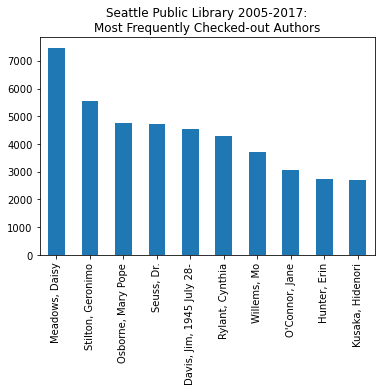

In [150]:
seattle_library_df['Author'].value_counts()[:10].plot(kind='bar', title='Seattle Public Library 2005-2017:\nMost Frequently Checked-out Authors') 

Above, we used the `.plot()` function, and we used the parameter `kind=` to specify a bar chart. If we wanted to make it easier to read, we could flip the orientation to a horizontal chart:

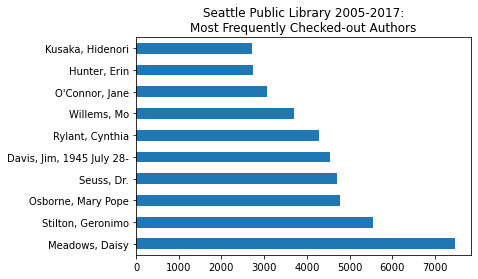

In [149]:
seattle_library_df['Author'].value_counts()[:10].plot(kind='barh', title='Seattle Public Library 2005-2017:\nMost Frequently Checked-out Authors') 


### ‼️ But wait --- we're looking at authors. But what about all those ***blank spots*** in the "Creator" column that show up as NaN??

Plotting functions in Python will ignore blank values. So all of those blank columns are ignored.

We can try and make these blank spots a little more descriptive, much like we did for our simpler lists! 


### `.isna()` , `.notna()`, and `.fillna()`
For dataframes, there are ways of sorting through missing data. These operations are called `.isna()` `.notna()` and `.fillna()`, which allow us to check if a value is NaN (or not), and to fill in blank values in a dataframe or in a section of a dataframe (like a column).

In [142]:
# Create a new column caled `Author_updated` that fills in all the blank spots in our `Creator` column with 
# "no author recorded"
seattle_library_df['Author_updated'] = seattle_library_df['Author'].fillna('no author recorded')

In [143]:
seattle_library_df

,CheckoutYear_CheckoutMonth,UsageClass,CheckoutType,MaterialType,Checkouts,Title,Author,Subjects,Publisher,PublicationYear,Author_updated
0,2011-04-01,Physical,Horizon,BOOK,15,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010,"A., Cookie"
1,2010-03-01,Physical,Horizon,BOOK,12,Sock innovation : knitting techniques & patter...,"A., Cookie","Knitting Patterns, Socks","Interweave Press LLC,",2009,"A., Cookie"
2,2011-02-01,Physical,Horizon,BOOK,12,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010,"A., Cookie"
3,2011-03-01,Physical,Horizon,BOOK,12,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010,"A., Cookie"
4,2011-06-01,Physical,Horizon,BOOK,10,Knit. sock. love. / Cookie A ; photography by ...,"A., Cookie","Knitting Patterns, Socks","One Leg Press,",2010,"A., Cookie"
...,...,...,...,...,...,...,...,...,...,...,...
581692,2016-02-01,Physical,Horizon,BOOK,10,"Selfish, shallow, and self-absorbed : sixteen ...",NaN,"Childfree choice, Parenthood Moral and ethical...","Picador,",2015,no author recorded
581693,2016-02-01,Physical,Horizon,BOOK,10,Dangerous women / edited by George R.R. Martin...,NaN,"Women Fiction, Fantasy fiction, Short stories","Tor,",2013,no author recorded
581694,2016-02-01,Physical,Horizon,BOOK,10,Peppa pig and the vegetable garden / Candlewic...,NaN,Gardening Juvenile fiction,"Candlewick Press,",2014,no author recorded
581695,2016-02-01,Physical,Horizon,BOOK,10,"Nighttime animals / [U.S. senior editor, Shann...",NaN,"Nocturnal animals Juvenile literature, Nocturn...","DK Publishing,",2015,no author recorded


## Exercise 2: Making a visualization

Nw let's try and plot again, this time, plotting the column of updated diseases. Write the code below for to plot the top ten authors from our "Authors_updated" column. 

In [152]:
### Your code here

## Exercise 3: Exploratory data analysis 

Let's try some of what we've learned!


### Exercise 3a:

Create a filter for all works by an author of your choice, and then use that filter to create a new data subset

### [Your Chosen Author Name Here] -- Click to edit

In [159]:
### Your code here

## Your code here

### Exercise 3b:
Find number of times that each work by your chosen author had been checked each month

  > Hint: Remember how the library sometimes has muliptle copies of a work?  
  > Remember that you can use  `groupby()` to consolidate all the titles
    

### Exercise 3c:
Finally, export that data subset to a CSV file 

In [157]:
### Your code here